In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import os
import matplotlib.pyplot as plt

In [2]:
input_file_aggr = 'Weighted_paths_network8_corrected_aggr_0.65' # this is the 'output_file_1.evaluated.filtered_0.67' file
input_file_non_aggr = 'Weighted_paths_network8_corrected_non_aggr_0.65'
ranking_file_aggr = './ranks/network8_alpha_0.65_corrected_aggr.desc'
ranking_file_non_aggr = './ranks/network8_alpha_0.65_corrected_non_aggr.desc'
N_aggr = 100
N_non_aggr = 150
# Only a gene that is in the top N of aggresive or non-aggresive (or both) is considered
output_file = 'subnetwork_network8_corrected_0.65_difference_aggr_non_aggr'+str(N_aggr)+'_'+str(N_non_aggr)+'.js'
output_file_components_directory = './components/subnetwork_network8_corrected_0.65_difference_aggr_non_aggr'+str(N_aggr)+'_'+str(N_non_aggr)+'/'

In [3]:
df_aggr = pd.read_csv(input_file_aggr,sep='[',skiprows=0,header=None)

In [4]:
df_non_aggr = pd.read_csv(input_file_non_aggr,sep='[',skiprows=0,header=None)

In [5]:
def ParseDataframe(df):
    df = df.rename(columns={0: 'path_weight', 1: 'genes_path'})
    df[['gene1','gene2','gene3']] = df['genes_path'].str.split(',',expand=True)
    df[['gene3','brol']] = df['gene3'].str.split(']',expand=True)
    df = df.drop(['brol','genes_path'], axis=1)
    df[['path_weight','brol']] = df['path_weight'].str.rsplit('-',1,expand=True)
    df = df.drop(['brol'], axis=1)
    return df

In [6]:
df_aggr = ParseDataframe(df_aggr)
df_aggr

/tmp/ipykernel_21896/683794502.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df[['path_weight','brol']] = df['path_weight'].str.rsplit('-',1,expand=True)


,path_weight,gene1,gene2,gene3
0,3.334306677122477e-9,'JAK1','RPS27A','TP53'
1,3.334317577895523e-9,'MET','RPS27A','TP53'
2,3.3348548873907977e-9,'RUNX3','RPS27A','TP53'
3,3.3350719967481267e-9,'FANCM','RPS27A','TP53'
4,3.3352613571875687e-9,'ZNRF3','RPS27A','TP53'
...,...,...,...,...
3479081,0.0004207010286736806,'BSG','SPN','SIGLEC1'
3479082,0.0004207010286736806,'SELE','SPN','SIGLEC1'
3479083,0.0004648641981659099,'SP1','SPN','SIGLEC1'
3479084,0.0006421541559811084,'IL1RAP','IL1RL2','IL36RN'


In [7]:
df_non_aggr = ParseDataframe(df_non_aggr)
df_non_aggr

/tmp/ipykernel_21896/683794502.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df[['path_weight','brol']] = df['path_weight'].str.rsplit('-',1,expand=True)


,path_weight,gene1,gene2,gene3
0,2.3797707488805965e-9,'SYNJ1','RPS27A','DVL2'
1,2.409464858047191e-9,'GLI2','RPS27A','CDH1'
2,2.423089310647553e-9,'PAF1','RPS27A','CDH1'
3,2.4253054522306976e-9,'FBXL22','RPS27A','CDH1'
4,2.4453421035051766e-9,'NRG1','RPS27A','GLI1'
...,...,...,...,...
9826760,0.00018292198395093617,'SH2D1A','SLAMF6','SH2D1B'
9826761,0.00018664634351227895,'IL17RB','IL17RA','IL17RC'
9826762,0.00018664634351227895,'IL17RE','IL17RA','IL17RC'
9826763,0.0002781425098026338,'EGR2','GJB1','GJB2'


In [8]:
df_ranking_aggr = pd.read_csv(ranking_file_aggr,sep='[',skiprows=0,header=None)
df_ranking_non_aggr = pd.read_csv(ranking_file_non_aggr,sep='[',skiprows=0,header=None)

In [9]:
ranking_genes_aggr = df_ranking_aggr[0].values.tolist()
ranking_genes_non_aggr = df_ranking_non_aggr[0].values.tolist()
df_ranking_top_aggr = df_ranking_aggr[0:N_aggr]
df_ranking_top_non_aggr = df_ranking_non_aggr[0:N_non_aggr]
top_genes_aggr = df_ranking_top_aggr[0].values.tolist()
top_genes_non_aggr = df_ranking_top_non_aggr[0].values.tolist()
top_genes2_aggr = []
top_genes2_non_aggr = []
for i in top_genes_aggr:
    a = '\''+i+'\''
    top_genes2_aggr.append(a)
for i in top_genes_non_aggr:
    a = '\''+i+'\''
    top_genes2_non_aggr.append(a)

In [10]:
top_genes_together = []
for i in top_genes_aggr:
    top_genes_together.append(i)
for i in top_genes_non_aggr:
    if i not in top_genes_together:
        top_genes_together.append(i)
        
top_genes2_together = []
for i in top_genes2_aggr:
    top_genes2_together.append(i)
for i in top_genes2_non_aggr:
    if i not in top_genes2_together:
        top_genes2_together.append(i)

In [11]:
print(len(top_genes_aggr))
print(len(top_genes_non_aggr))
print(len(top_genes_together))
top_genes_together

100
150
181


['EP300',
 'TP53',
 'STAT1',
 'SP1',
 'E2F1',
 'STAT2',
 'ZNF318',
 'RHOA',
 'ZBTB11',
 'CTCF',
 'CXXC4',
 'SIX5',
 'MYC',
 'CEBPZ',
 'ZNF274',
 'HMGN3',
 'ZNF766',
 'FOS',
 'MBD3',
 'ZNF197',
 'ZNF639',
 'SMAD5',
 'MYNN',
 'CBX2',
 'RAC1',
 'SATB1',
 'JUN',
 'FOXA1',
 'TGIF2',
 'ACTG1',
 'ZHX2',
 'IRF4',
 'ESR1',
 'BRF2',
 'ARID2',
 'NR2C2',
 'SNAPC4',
 'NFKB1',
 'AKT1',
 'ZHX1',
 'CREB3',
 'CEBPB',
 'SP3',
 'ZNF24',
 'HBP1',
 'KRAS',
 'YY1',
 'MBD1',
 'POLR2B',
 'GNB1',
 'NOTCH1',
 'HSPA8',
 'SMAD1',
 'PCGF2',
 'DCN',
 'HDAC3',
 'AR',
 'RAC3',
 'ACTN3',
 'HES1',
 'RELA',
 'ZNF644',
 'ADNP',
 'DVL1',
 'RAD21',
 'SETDB1',
 'ETS1',
 'ZBTB33',
 'GNG2',
 'BCAN',
 'GPLD1',
 'ZZZ3',
 'CEBPA',
 'FGFR1',
 'CDKN1B',
 'PSMC1',
 'E2F4',
 'PTPRD',
 'CTNNB1',
 'ZNF263',
 'IGF2',
 'APOB',
 'NFYB',
 'ZNF207',
 'UBC',
 'MUC16',
 'RPS27A',
 'PGR',
 'PIGQ',
 'PCDHB8',
 'TDRKH',
 'C3',
 'UBA52',
 'HSPG2',
 'TFDP1',
 'FAT2',
 'PCDHB7',
 'PSMD6',
 'MYH6',
 'EIF4E',
 'GLYR1',
 'ZNF92',
 'TERF2',
 'ZNF175',

In [12]:
df_final_aggr = df_aggr[(df_aggr['gene1'].isin(top_genes2_together) & df_aggr['gene2'].isin(top_genes2_together)) | (df_aggr['gene1'].isin(top_genes2_together) & df_aggr['gene3'].isin(top_genes2_together))|(df_aggr['gene2'].isin(top_genes2_together) & df_aggr['gene3'].isin(top_genes2_together))]
df_final_aggr

,path_weight,gene1,gene2,gene3
0,3.334306677122477e-9,'JAK1','RPS27A','TP53'
1,3.334317577895523e-9,'MET','RPS27A','TP53'
2,3.3348548873907977e-9,'RUNX3','RPS27A','TP53'
3,3.3350719967481267e-9,'FANCM','RPS27A','TP53'
4,3.3352613571875687e-9,'ZNRF3','RPS27A','TP53'
...,...,...,...,...
3478900,6.340611723828647e-5,'ZNF92','PTPRD','SLITRK3'
3478913,6.572402190205125e-5,'ZNF750','CSMD2','ZNF24'
3478915,6.881249293418207e-5,'ZNF197','USP31','ZNF24'
3478980,8.742994462561818e-5,'SNAPC4','TDRKH','TDRD6'


In [13]:
df_final_non_aggr = df_non_aggr[(df_non_aggr['gene1'].isin(top_genes2_together) & df_non_aggr['gene2'].isin(top_genes2_together)) | (df_non_aggr['gene1'].isin(top_genes2_together) & df_non_aggr['gene3'].isin(top_genes2_together)) | (df_non_aggr['gene2'].isin(top_genes2_together) & df_non_aggr['gene3'].isin(top_genes2_together))]
df_final_non_aggr

,path_weight,gene1,gene2,gene3
1,2.409464858047191e-9,'GLI2','RPS27A','CDH1'
2,2.423089310647553e-9,'PAF1','RPS27A','CDH1'
3,2.4253054522306976e-9,'FBXL22','RPS27A','CDH1'
4,2.4453421035051766e-9,'NRG1','RPS27A','GLI1'
6,2.4502145941021685e-9,'PSME1','RPS27A','CDH1'
...,...,...,...,...
9826483,2.9129027414448965e-5,'CLCA4','ANO5','CLCA2'
9826487,2.9293655417111767e-5,'CLCA2','ANO4','CLCA4'
9826488,2.9316972143805046e-5,'CLCA4','ANO4','CLCA2'
9826542,3.477065606297496e-5,'CLCA2','ANO9','CLCA4'


In [14]:
def calculateEdges(df,df_final,top_genes,top_genes2):
    edges = {}
    Normalization = sum(df['path_weight'].astype(float)) # Explained in the paper of OMEN
    for i in range(len(top_genes)):
        print(i)
        for j in range(len(top_genes)-1-i):
            node1 = top_genes[i]
            node2 = top_genes[i+1+j]
            nodes = []
            nodes.append(top_genes2[i])
            nodes.append(top_genes2[i+1+j])
            df_edge = df_final[ (df_final['gene1'].isin(nodes) & df_final['gene2'].isin(nodes)) | (df_final['gene1'].isin(nodes) & df_final['gene3'].isin(nodes)) | (df_final['gene2'].isin(nodes) & df_final['gene3'].isin(nodes))]
            s = sum(df_edge['path_weight'].astype(float))/Normalization
            if s>0:
                edges[(node1,node2)] = s*100000 # to have bigger values
    return edges 

In [15]:
edges_aggr = calculateEdges(df_aggr,df_final_aggr,top_genes_together,top_genes2_together)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180


In [16]:
edges_non_aggr = calculateEdges(df_non_aggr,df_final_non_aggr,top_genes_together,top_genes2_together)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180


In [17]:
edges_aggr

{('EP300', 'TP53'): 5.221132736861464,
 ('EP300', 'STAT1'): 3.406743157993491,
 ('EP300', 'SP1'): 4.759061455375244,
 ('EP300', 'E2F1'): 5.630369116270295,
 ('EP300', 'STAT2'): 4.293030492784228,
 ('EP300', 'ZNF318'): 0.8601853028362627,
 ('EP300', 'RHOA'): 0.3437708279688088,
 ('EP300', 'CTCF'): 6.305375607726216,
 ('EP300', 'MYC'): 2.537528592873123,
 ('EP300', 'CEBPZ'): 0.13516396552846577,
 ('EP300', 'FOS'): 2.9524388695744315,
 ('EP300', 'SMAD5'): 2.5496945056202835,
 ('EP300', 'JUN'): 2.462377756786118,
 ('EP300', 'FOXA1'): 7.176635266656475,
 ('EP300', 'ACTG1'): 0.4865761784297574,
 ('EP300', 'ZHX2'): 2.8432560836142944,
 ('EP300', 'IRF4'): 6.215502732122943,
 ('EP300', 'ESR1'): 2.807980769288866,
 ('EP300', 'NFKB1'): 2.2862078820509697,
 ('EP300', 'AKT1'): 3.6306809538079836,
 ('EP300', 'CREB3'): 2.671417032114168,
 ('EP300', 'CEBPB'): 2.605614117753554,
 ('EP300', 'SP3'): 0.785627619519605,
 ('EP300', 'ZNF24'): 0.5152554577046153,
 ('EP300', 'KRAS'): 3.1692121842549006,
 ('EP3

In [18]:
edges_non_aggr

{('EP300', 'TP53'): 2.323515259683592,
 ('EP300', 'STAT1'): 3.2720910323536234,
 ('EP300', 'SP1'): 1.5123327609959996,
 ('EP300', 'E2F1'): 1.9239871161726734,
 ('EP300', 'STAT2'): 3.3118047756340974,
 ('EP300', 'CTCF'): 2.2031501982804524,
 ('EP300', 'MYC'): 2.2905127659409494,
 ('EP300', 'CEBPZ'): 0.00753308307796595,
 ('EP300', 'FOS'): 1.5491584212916054,
 ('EP300', 'SMAD5'): 1.651242556159851,
 ('EP300', 'JUN'): 1.2735865357320457,
 ('EP300', 'FOXA1'): 1.8043366901041256,
 ('EP300', 'ZHX2'): 2.107885721403244,
 ('EP300', 'IRF4'): 2.620117668520635,
 ('EP300', 'ESR1'): 1.6097950483499661,
 ('EP300', 'NFKB1'): 1.2597181684968837,
 ('EP300', 'AKT1'): 1.4142914854247362,
 ('EP300', 'CREB3'): 1.6013563635250192,
 ('EP300', 'CEBPB'): 1.221334649763761,
 ('EP300', 'SP3'): 0.19708788129893698,
 ('EP300', 'KRAS'): 1.3054073025473494,
 ('EP300', 'YY1'): 1.5201224602534287,
 ('EP300', 'POLR2B'): 0.9873719486359472,
 ('EP300', 'NOTCH1'): 1.1333305433761334,
 ('EP300', 'HSPA8'): 1.31427002772120

In [19]:
print(len(edges_aggr))
print(len(edges_non_aggr))

6525
6615


In [20]:
sum_edges_aggr = 0
sum_edges_non_aggr = 0
for i in edges_aggr:
    sum_edges_aggr = sum_edges_aggr + edges_aggr[i]
for i in edges_non_aggr:
    sum_edges_non_aggr = sum_edges_non_aggr + edges_non_aggr[i]
print('Aggressive:')
print(len(edges_aggr))
print(sum_edges_aggr)
print(sum_edges_aggr/len(edges_aggr))
print('Non-aggressive:')
print(len(edges_non_aggr))
print(sum_edges_non_aggr)
print(sum_edges_non_aggr/len(edges_non_aggr))

Aggressive:
6525
4719.7028149824855
0.7233261019130246
Non-aggressive:
6615
3276.6534179676737
0.49533687346450095


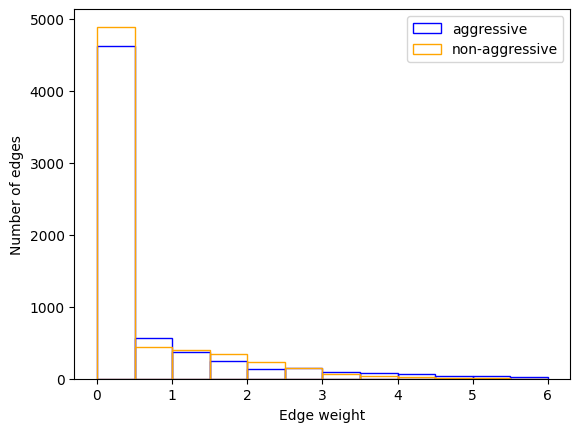

In [21]:
edge_aggr_weights = list(edges_aggr.values())
edge_non_aggr_weights = list(edges_non_aggr.values())
plt.hist(edge_aggr_weights,bins=12,range=[0,6],edgecolor='blue',fill=False,label='aggressive')
plt.hist(edge_non_aggr_weights,bins=12,range=[0,6],edgecolor='orange',fill=False,label='non-aggressive')
plt.xlabel('Edge weight')
plt.ylabel('Number of edges')
plt.legend()
plt.savefig('Density_edge_weight_corrected_100_150.png')

In [22]:
edges_difference_weight = {} # weight = weight aggressive - weight non-aggressive
for i in edges_aggr:
    if i in edges_non_aggr:
        edges_difference_weight[i] = edges_aggr[i]-edges_non_aggr[i]
    else:
        edges_difference_weight[i] = edges_aggr[i]
for i in edges_non_aggr:
    if i not in edges_difference_weight:
        edges_difference_weight[i] = -edges_non_aggr[i]
print(len(edges_difference_weight))
edges_difference_weight

9396


{('EP300', 'TP53'): 2.897617477177872,
 ('EP300', 'STAT1'): 0.1346521256398674,
 ('EP300', 'SP1'): 3.246728694379245,
 ('EP300', 'E2F1'): 3.706382000097621,
 ('EP300', 'STAT2'): 0.9812257171501311,
 ('EP300', 'ZNF318'): 0.8601853028362627,
 ('EP300', 'RHOA'): 0.3437708279688088,
 ('EP300', 'CTCF'): 4.102225409445763,
 ('EP300', 'MYC'): 0.2470158269321736,
 ('EP300', 'CEBPZ'): 0.1276308824504998,
 ('EP300', 'FOS'): 1.403280448282826,
 ('EP300', 'SMAD5'): 0.8984519494604326,
 ('EP300', 'JUN'): 1.188791221054072,
 ('EP300', 'FOXA1'): 5.37229857655235,
 ('EP300', 'ACTG1'): 0.4865761784297574,
 ('EP300', 'ZHX2'): 0.7353703622110506,
 ('EP300', 'IRF4'): 3.5953850636023077,
 ('EP300', 'ESR1'): 1.1981857209389,
 ('EP300', 'NFKB1'): 1.026489713554086,
 ('EP300', 'AKT1'): 2.2163894683832472,
 ('EP300', 'CREB3'): 1.070060668589149,
 ('EP300', 'CEBPB'): 1.3842794679897932,
 ('EP300', 'SP3'): 0.5885397382206681,
 ('EP300', 'ZNF24'): 0.5152554577046153,
 ('EP300', 'KRAS'): 1.8638048817075512,
 ('EP3

In [23]:
df_edges_difference_weight = pd.DataFrame.from_dict(edges_difference_weight,orient='index',columns=['Difference'])
df_edges_difference_weight = df_edges_difference_weight.sort_values(by=['Difference'],ascending=False)
df_edges_difference_weight

,Difference
"(DCN, BCAN)",34.909525
"(CEBPZ, TDRKH)",29.081514
"(SNAPC4, TDRKH)",23.909961
"(ZBTB11, PIGQ)",22.050463
"(BRF2, PIGQ)",21.599934
...,...
"(ZNF207, GLYR1)",-3.965013
"(GLYR1, DNMT1)",-4.258383
"(ZNF165, ITGB2)",-5.562778
"(RHOB, RHOC)",-5.871288


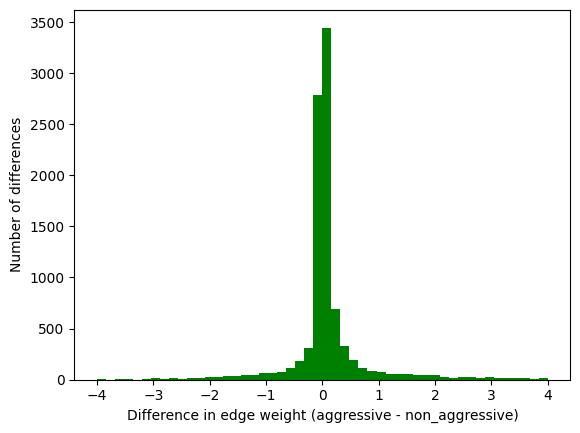

In [24]:
differences = list(df_edges_difference_weight['Difference'])
plt.hist(differences,bins=50,range=[-4,4],color='green')
plt.xlabel('Difference in edge weight (aggressive - non_aggressive)')
plt.ylabel('Number of differences')
plt.savefig('Density_edge_weight_difference_corrected_100_150.png')

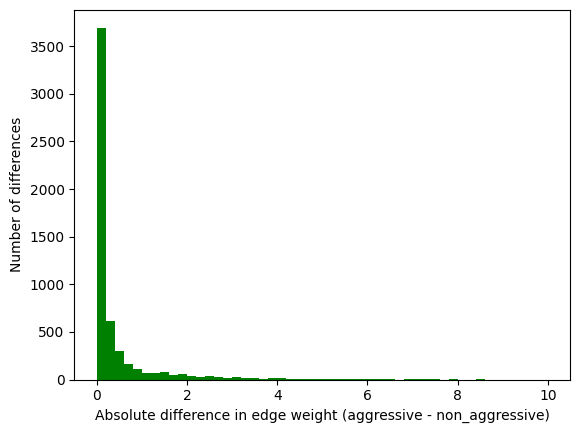

In [25]:
differences_absolute = []
for d in differences:
    if d < 0:
        differences_absolute.append(-1*d)
    else:
        differences_absolute.append(d)
plt.hist(differences,bins=50,range=[0,10],color='green')
plt.xlabel('Absolute difference in edge weight (aggressive - non_aggressive)')
plt.ylabel('Number of differences')
plt.savefig('Density_edge_weight_absolute_difference_corrected_100_150.png')

In [36]:
filter_value = np.percentile(differences_absolute, 95)
filter_value

1.8798701813630607

In [37]:
len(df_edges_difference_weight.loc[(df_edges_difference_weight['Difference'] > filter_value)])

350

In [38]:
len(df_edges_difference_weight.loc[(df_edges_difference_weight['Difference'] < -1*filter_value)])

120

In [29]:
with open(output_file,'w') as f:
    f.write('graph = {')
    f.write('\n')
    f.write('    nodes: [')
    f.write('\n')
    for i in range(len(top_genes_together)):
        f.write('        {') 
        f.write('\n')
        f.write('            id: ' + top_genes2_together[i] + ',') 
        f.write('\n')
        try:
            f.write('            rank_aggr: ' + str(1+ranking_genes_aggr.index(top_genes_together[i])) + ',') 
        except ValueError:
            f.write('            rank_aggr: ' + str(-1) + ',') 
        f.write('\n')
        try:
            f.write('            rank_non_aggr: ' + str(1+ranking_genes_non_aggr.index(top_genes_together[i])) + ',') 
        except ValueError:
            f.write('            rank_non_aggr: ' + str(-1) + ',') 
        f.write('\n')
        f.write('        },') 
        f.write('\n')
    f.write('    ],')
    f.write('\n')
    f.write('    links: [')
    f.write('\n')
    for edge in edges_difference_weight:
        if edges_difference_weight[edge] > 0:
            f.write('        {source: "'+ edge[0] +'", target: "'+edge[1]+'", type: "pp_red", direction: "directed", max_cost: '+ str(edges_difference_weight[edge]) +', evidence: ""},')
        else:
            f.write('        {source: "'+ edge[0] +'", target: "'+edge[1]+'", type: "pp_blue", direction: "directed", max_cost: '+ str(-1*edges_difference_weight[edge]) +', evidence: ""},')
        f.write('\n')
    f.write('    ],')
    f.write('\n')
    f.write('}')
f.close()

In [30]:
def componentsFilteredEdges(edges,Filter):
    array1 = []
    for edge in edges:
        if edges[edge]>Filter:
            array1.append(edge)
    G = nx.Graph()
    G.add_edges_from(array1)
    r = list(nx.connected_components(G))
    return r

In [31]:
def writeComponents(edges,Filters):
    edges_pos = {}
    edges_neg = {}
    for e in edges:
        if edges[e]>0:
            edges_pos[e] = edges[e]
        else:
            edges_neg[e] = -1*edges[e]
    for f in Filters:
        components_pos = componentsFilteredEdges(edges_pos,f)
        components_neg = componentsFilteredEdges(edges_neg,f)
        file_pos = 'components_stronger_in_aggr_' + str(f)
        file_neg = 'components_stronger_in_non_aggr_' + str(f)
        with open(output_file_components_directory+file_pos,'w') as f:
            i = 1
            for c in components_pos:
                f.write('Component'+str(i)+': ')
                f.write(str(c))
                f.write('\n')
                i = i + 1
        f.close()
        with open(output_file_components_directory+file_neg,'w') as f:
            i = 1
            for c in components_neg:
                f.write('Component'+str(i)+': ')
                f.write(str(c))
                f.write('\n')
                i = i + 1
        f.close()

In [32]:
path = os.path.join(output_file_components_directory)
os.mkdir(path)
writeComponents(edges_difference_weight,[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12])